# Inicializar


In [ ]:
!pip3 install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score, train_test_split, KFold,cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer,confusion_matrix, classification_report, get_scorer_names
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time
from pandas.plotting import scatter_matrix

## Começando

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
wine = pd.concat([wine_quality.data.features , wine_quality.data.targets ], axis=1)
features_names=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',	'free_sulfur_dioxide'	,'total_sulfur_dioxide',	'density'	,'pH'	,'sulphates',	'alcohol',	'quality']

### Estatísticas

In [ ]:
len(wine.quality.unique())

7

In [ ]:
wine.shape

(6497, 12)



*   N = 6497 observações
*   P = 12 número de preditores
*   L = 7 número de saídas possíveis para a coluna alvo "quality"



In [ ]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000



*   Os valores máximos das colunas "residual_sugar","free_sulfur_dioxide" e "total_sulfur_dioxide" são muito maiores que a mediana.
*   Essa observação indica que há muitos outliers no nosso dataset.




### Entendendo a target *quality*

In [ ]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


*  A variável alvo/variável dependente é de natureza discreta e inteira.
*   "quality" está com valores entre 3 e 9.

In [ ]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64



* Esse comando nos mostra os valores em ordem descrescente.
* "quality" tem a maior parte dos valores concentrados entre 5 e 7.



### Checando a existência de valores faltantes

<Axes: >

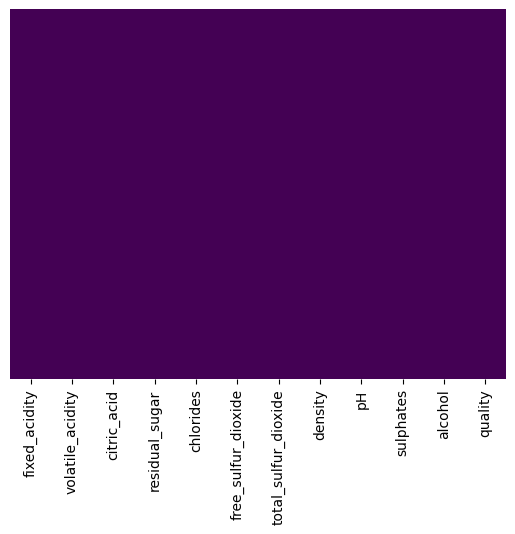

In [ ]:
sns.heatmap(wine.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* Dataset não tem valores faltantes.
* Caso tivesse algum valor faltante, seria mostrado com uma cor diferente da roxa.

### Checando a correlação linear entre as features

<Axes: >

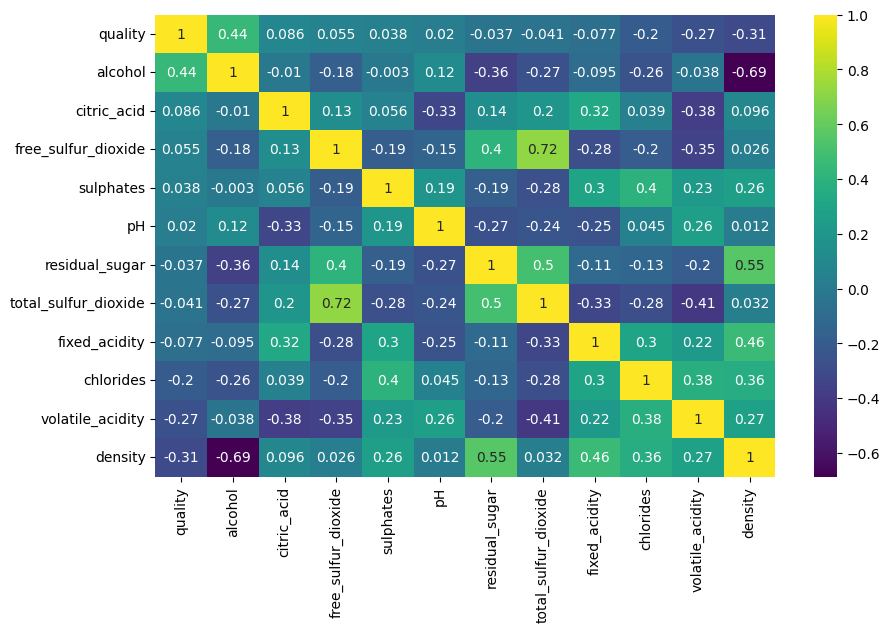

In [ ]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = wine.corr().nlargest(k, 'quality')['quality'].index
cm = wine[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')


*   Aqui podemos inferir que a "quality" tem forte correlação positiva com o "alcohol", enquanto tem forte correlação negativa com o "density".
* "free_sulfur_dioxide" e "citric_acid" quase não têm correlação com "quality".
* Como a correlação é quase zero, podemos inferir que não há relação linear entre esses dois preditores. No entanto, é seguro descartar esses recursos caso você esteja aplicando o modelo de regressão linear ao conjunto de dados, o que não é o caso, pois trabalharemos com classificação linear.

### Checando Outliers

In [ ]:
l = wine.columns.values
l

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [ ]:
number_of_columns=12
number_of_rows = 12
number_of_rows

12

In [ ]:
plt.figure(figsize=(number_of_columns,5*number_of_rows))

<Figure size 1200x6000 with 0 Axes>

<Figure size 1200x6000 with 0 Axes>

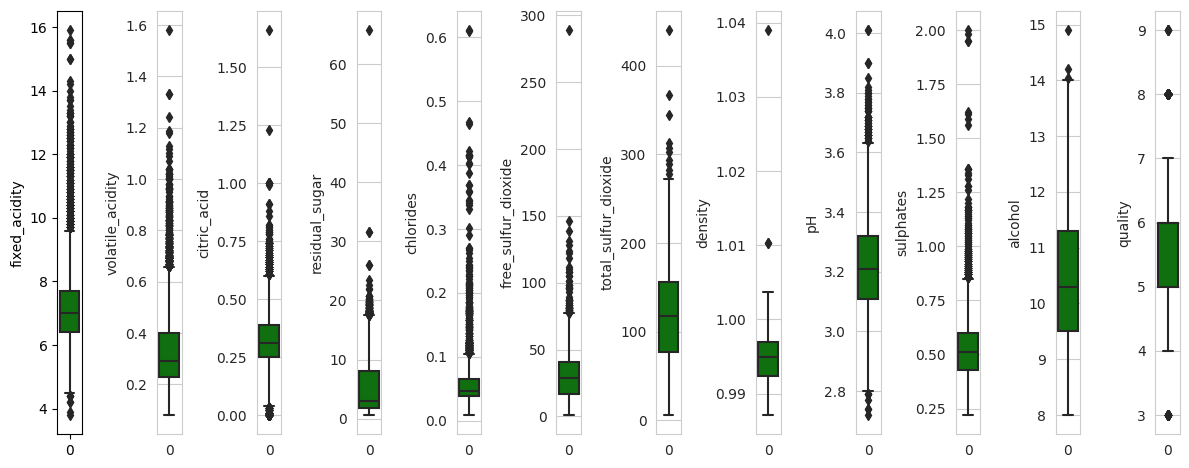

In [ ]:
l = wine.columns.values
number_of_columns=12
number_of_rows = 12
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(wine[l[i]],color='green',orient='v')
    plt.ylabel(l[i],fontsize='10')
    plt.tight_layout()

*   Somente a coluna target "alcohol" não mostra outliers

### Checagem do skewness

In [ ]:
wine.skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64



*   Percebemos uma assimetria positiva em todas as colunas. Entretanto, não há valores tão altos, dessa forma não necessário tratar a assimetria pra todos os casos.
*   "total_sulfur_dioxide", "alcohol" e "pH" são as colunas que tem menor assimetria.



### Checando scatter_matrix

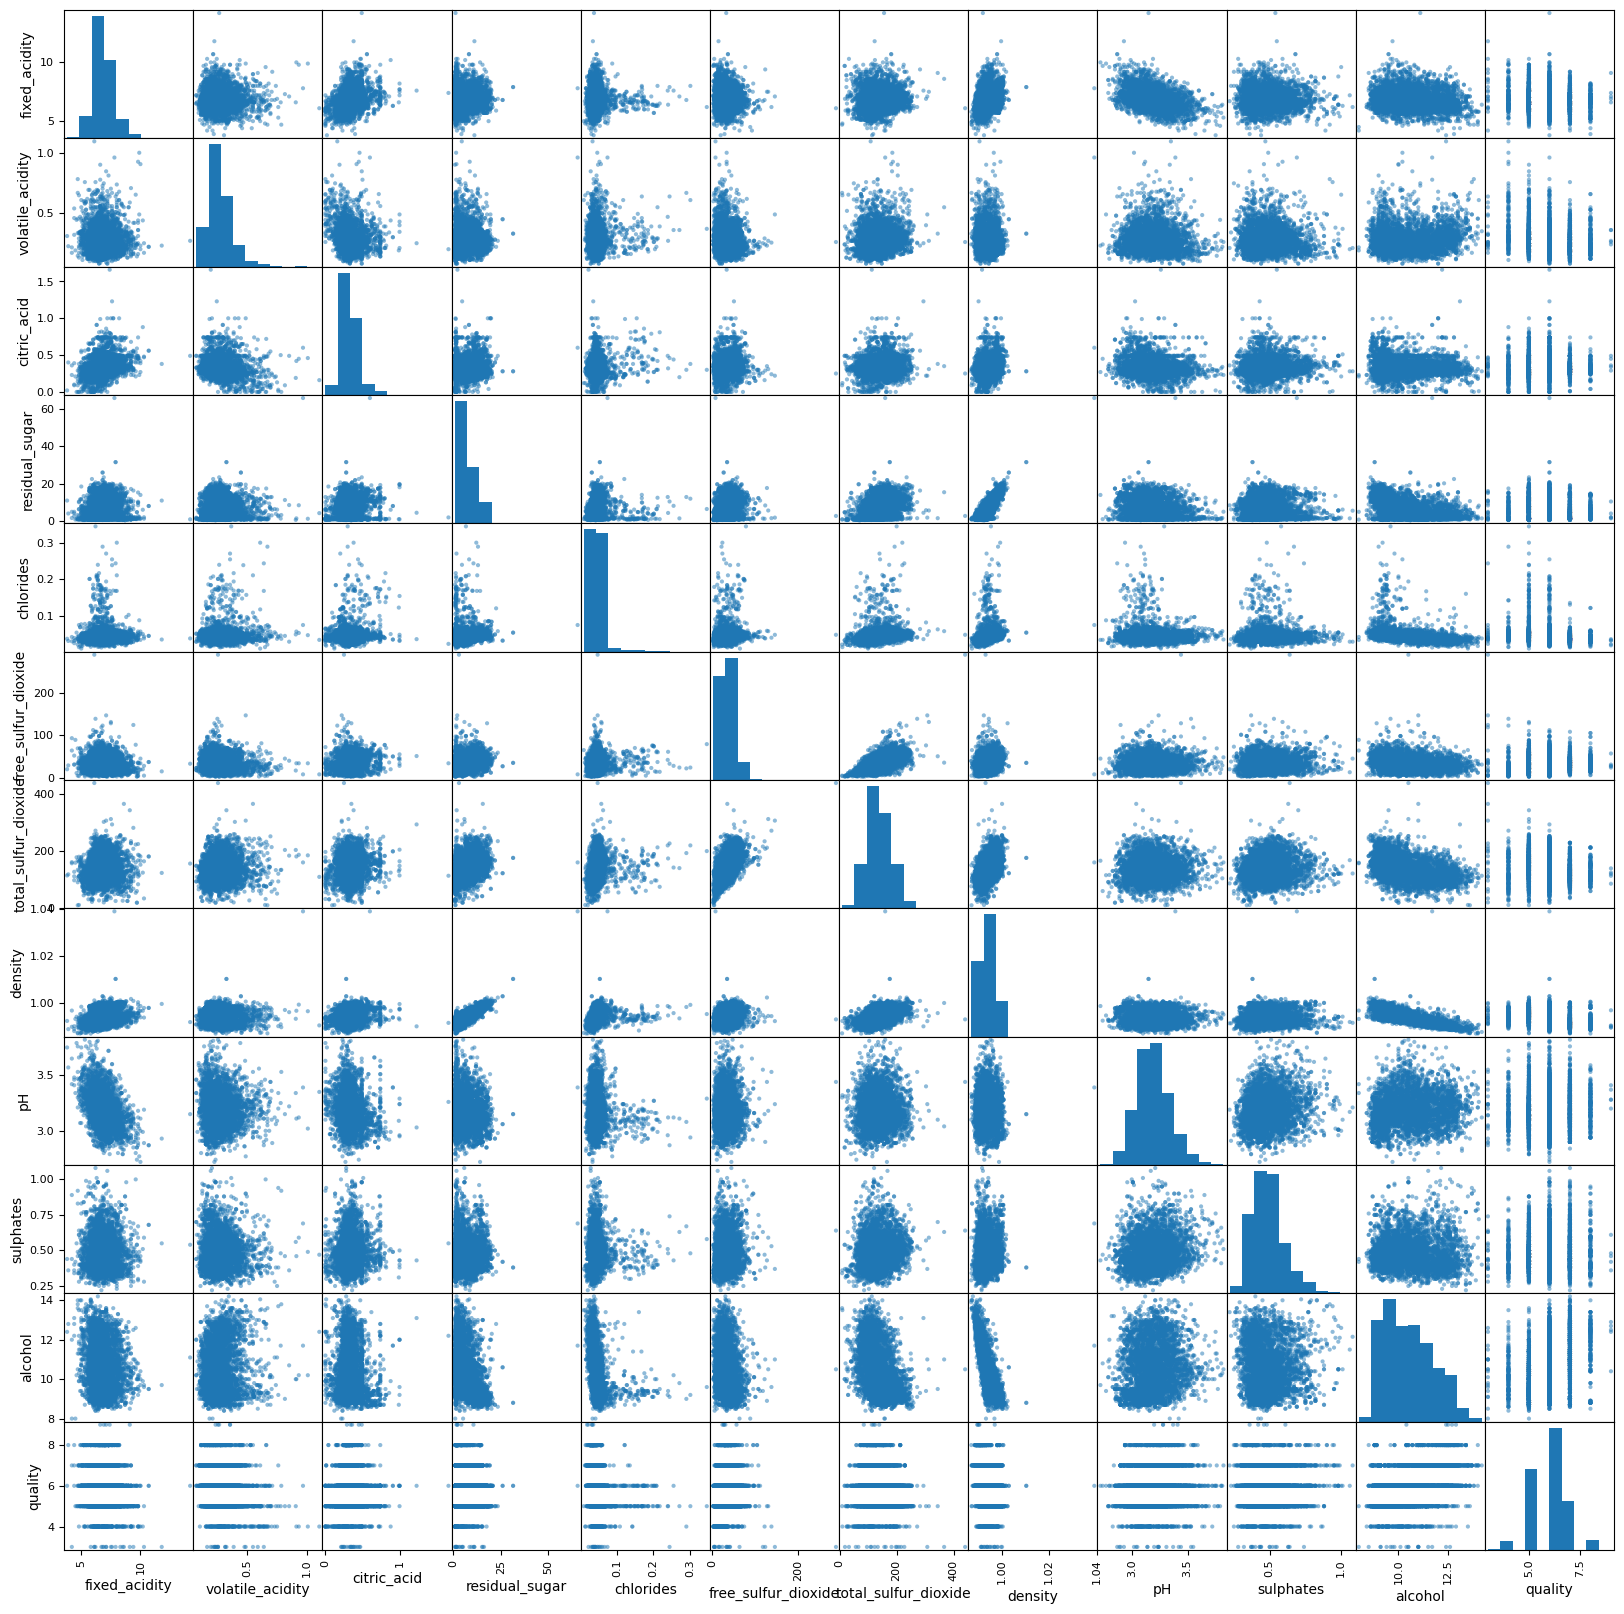

In [ ]:
scatter_matrix(wine, alpha=0.5, figsize=(20, 20))
plt.show()

<Axes: xlabel='quality', ylabel='fixed_acidity'>

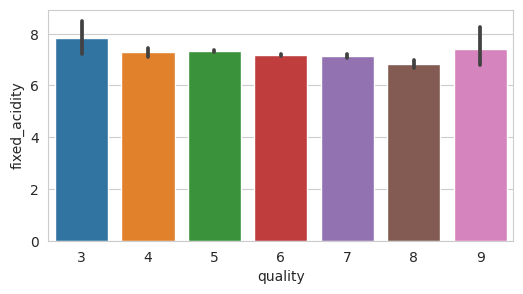

In [ ]:
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric_acid'>

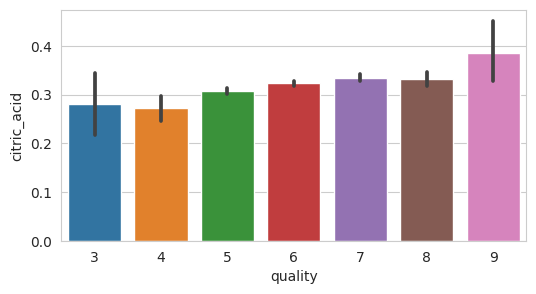

In [ ]:
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

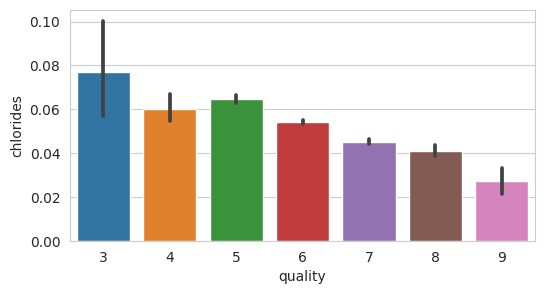

In [ ]:
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='pH'>

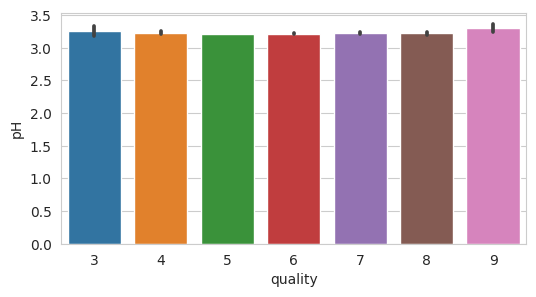

In [ ]:
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'pH', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

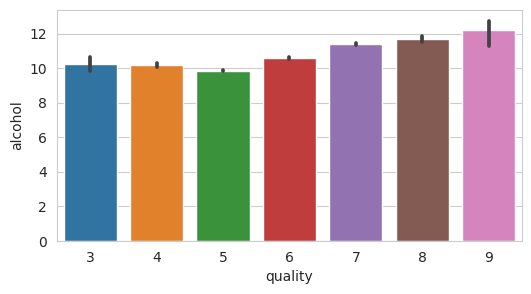

In [ ]:
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Pré-processamento

### Há valores nulos?

In [ ]:
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 Não há valores nulos, portanto não será necessário tirar linhas

### Nesse caso, não vamos retirar colunas que não tem correlação nenhuma com a coluna target

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
wine = pd.concat([wine_quality.data.features , wine_quality.data.targets ], axis=1)


### Removendo outliers

In [ ]:
def remove_outliers_iqr(dataframe, colunas=None):
    """
    Remove outliers de um DataFrame usando a regra do IQR (Intervalo Interquartil) para as colunas especificadas.
    Se nenhuma coluna for especificada, todas as colunas numéricas serão processadas.

    Args:
    dataframe (pd.DataFrame): O DataFrame contendo os dados com possíveis outliers.
    colunas (list): Lista das colunas a serem processadas. Se None, todas as colunas numéricas serão processadas.

    Returns:
    pd.DataFrame: Um novo DataFrame com outliers removidos.
    """
    # Cria um DataFrame de cópia para evitar modificações no original
    df_cleaned = dataframe.copy()

    # Se colunas não for especificada, seleciona todas as colunas numéricas
    if colunas is None:
        colunas = df_cleaned.select_dtypes(include=['number']).columns.tolist()

    # Itera sobre as colunas especificadas
    for col in colunas:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove os outliers da coluna
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [ ]:
features_names=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',	'free_sulfur_dioxide'	,'total_sulfur_dioxide',	'density'	,'pH', 'sulphates', 'alcohol']

In [ ]:
wine_pre_processed = remove_outliers_iqr(wine, features_names)

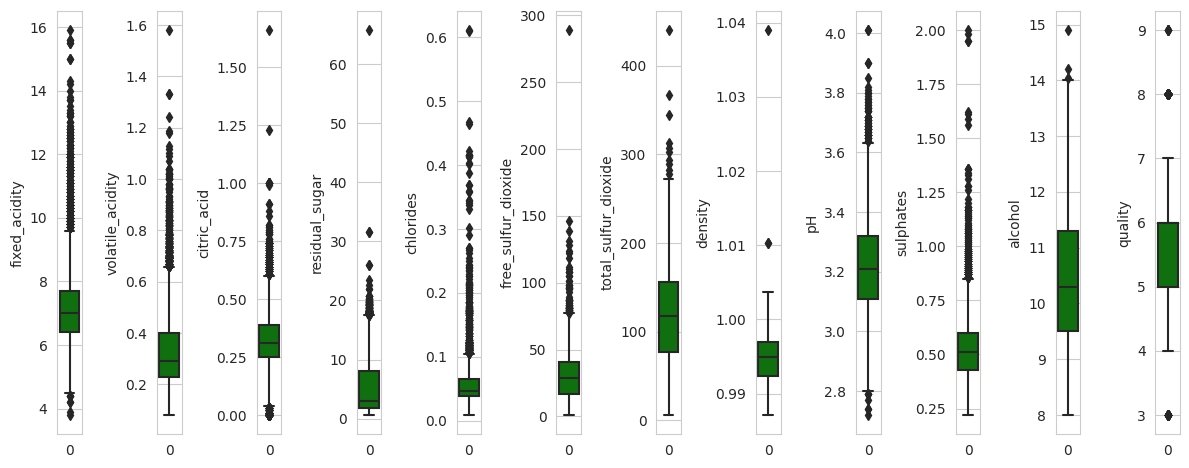

In [ ]:
l = wine.columns.values
number_of_columns=12
number_of_rows = 12
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(wine[l[i]],color='green',orient='v')
    plt.ylabel(l[i],fontsize='10')
    plt.tight_layout()

In [ ]:
#antes de remover outliers
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
#após de remover outliers
wine_pre_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4596.0,6.911086,0.832795,4.70000,6.40000,6.80000,7.4000,9.60000
volatile_acidity,4596.0,0.283949,0.100981,0.08000,0.21000,0.27000,0.3300,0.64500
citric_acid,4596.0,0.320329,0.089931,0.09000,0.26000,0.31000,0.3700,0.56000
residual_sugar,4596.0,5.936379,4.744048,0.60000,1.80000,4.60000,8.9125,18.95000
chlorides,4596.0,0.044533,0.012695,0.00900,0.03600,0.04300,0.0510,0.08100
free_sulfur_dioxide,4596.0,33.077023,15.367902,2.00000,22.00000,32.00000,44.0000,78.00000
total_sulfur_dioxide,4596.0,130.022628,46.757693,6.00000,101.00000,128.00000,162.0000,253.00000
density,4596.0,0.994004,0.002821,0.98711,0.99172,0.99388,0.9961,1.00182
pH,4596.0,3.200912,0.143396,2.82000,3.10000,3.19000,3.3000,3.59000
sulphates,4596.0,0.493906,0.108610,0.22000,0.41000,0.48000,0.5600,0.79000


In [ ]:
wine_pre_processed.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.shape

(6497, 12)

In [ ]:
wine_pre_processed.shape

(4596, 12)

### Corrigindo a assimetria

In [ ]:
colunas_box_cox = ['volatile_acidity', 'chlorides', 'free_sulfur_dioxide']

In [ ]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method = 'box-cox')
pt.fit(wine_pre_processed[colunas_box_cox])
wine_pre_processed[colunas_box_cox] = pt.transform(wine_pre_processed[colunas_box_cox])

In [ ]:
wine_pre_processed.skew()

fixed_acidity           0.449676
volatile_acidity       -0.000079
citric_acid             0.248929
residual_sugar          0.818827
chlorides               0.008709
free_sulfur_dioxide    -0.071627
total_sulfur_dioxide   -0.078460
density                 0.154551
pH                      0.173169
sulphates               0.514754
alcohol                 0.429557
quality                 0.200819
dtype: float64

### Funções necessárias

In [ ]:
def plot_confusion_matrix(model, y_pred, y_test):
  cm = confusion_matrix(y_test, y_pred)
  classes = np.unique(y_test)

  fig = sp.make_subplots(rows=1, cols=1)

  fig.add_trace(
      go.Heatmap(
          z=cm,
          x=classes,
          y=classes,
          colorscale="Blues",
          reversescale=True,
          showscale=False,
          hoverongaps=False,
          hovertemplate="Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>",
      )
  )

  annotations = []
  for i in range(len(classes)):
      for j in range(len(classes)):
          annotations.append(
              dict(
                  x=classes[j],
                  y=classes[i],
                  text=str(cm[i, j]),
                  showarrow=False,
                  font=dict(color="black"),
              )
          )

  fig.update_layout(
      title="Confusion Matrix", width=600, height=500, annotations=annotations
  )

  fig.update_xaxes(title_text="Predicted")
  fig.update_yaxes(title_text="Actual")

  fig.show()

## Divisão e treino

In [ ]:
wine_pre_processed.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
20,8.9,-0.565513,0.48,1.8,2.192095,-0.180292,60.0,0.9968,3.39,0.53,9.4,6
25,6.3,1.093533,0.16,1.4,2.350813,-1.554592,23.0,0.9955,3.34,0.56,9.3,5
26,7.6,1.237324,0.24,1.8,2.350813,-2.299400,11.0,0.9962,3.28,0.59,9.5,5
33,6.9,2.349844,0.12,10.7,1.973483,0.508530,83.0,0.9993,3.45,0.52,9.4,6
37,8.1,1.018777,0.28,2.1,1.569486,-1.376069,30.0,0.9968,3.23,0.73,9.7,7


In [ ]:
wine_pre_processed["quality"] = np.where(wine_pre_processed["quality"] > 5, 1, 0)

In [ ]:
wine_pre_processed.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
20,8.9,-0.565513,0.48,1.8,2.192095,-0.180292,60.0,0.9968,3.39,0.53,9.4,1
25,6.3,1.093533,0.16,1.4,2.350813,-1.554592,23.0,0.9955,3.34,0.56,9.3,0
26,7.6,1.237324,0.24,1.8,2.350813,-2.299400,11.0,0.9962,3.28,0.59,9.5,0
33,6.9,2.349844,0.12,10.7,1.973483,0.508530,83.0,0.9993,3.45,0.52,9.4,1
37,8.1,1.018777,0.28,2.1,1.569486,-1.376069,30.0,0.9968,3.23,0.73,9.7,1


In [ ]:
y = wine_pre_processed['quality']
X = wine_pre_processed.drop('quality', axis=1)

In [ ]:
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 42)

### Tópico 1

Use os preditores do conjunto de treinamento para aprender um modelo de classificação linear e
testar o modelo usando o conjunto de teste. Para a tarefa, você deve selecionar uma classificação
logística ou um método de análise discriminante linear. Quantos preditores você usaria para ajustar
o modelo? Após treinar o modelo, calcule a matriz de confusão e a fração geral de previsões
corretas. Explique o que a matriz de confusão está lhe dizendo sobre os tipos de erros de
classificação cometidos pelo método.

#### Regressão Logística


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [ ]:
plot_confusion_matrix(lr, y_pred, y_test)

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

links importantes para entender as formulas e significado da acuracy, precision e recall : [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy?hl=pt-br) e [precision e recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=pt-br)

acuracy = (TP + TN) / (TP + TN + FP + FN)

In [ ]:
acuracy = (cm[0,0] + cm[1,1]) /(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
acuracy

0.7483683828861494

A acurácia é de 0,7483, ou 74,83% (aproximadamente 75 previsões corretas de 100 exemplos totais). Isso significa que o classificador de vinhos está fazendo um  trabalho razoável para identificar, certo?

Dos 100 exemplos de vinhos, vamos supor a acurácia com valor de 75% para facilitar os calculos e também vamos supor que 25 do vinhos são ruins  (4 TNs e 21 FP)  e 75 dos vinhos são bons  (74 TP e 1 FN).

Na verdade, vamos fazer uma análise mais precisa dos positivos e negativos para obter mais insights sobre o desempenho do nosso modelo.


Dos 75 vinhos bons, o modelo identifica corretamente 74 como bom (TP). Isso é positivo. No entanto, dos 25 vinhos ruins, o modelo pode identificar apenas 4 como ruim de fato (TN), um resultado terrível, já que 21 de 25 vinhos ruins não são diagnosticados.

Para isso vamos temos que checar outras estatísticas como o recall e precision.



precision = (TP) / (TP + FP)

In [ ]:
precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
precision

0.7769156159068865

**Qual a proporção de identificações positivas estava correta?**

Este precision significa que, quando o algoritmo prevê que o vinho é bom (classe positiva), está correto em 77,69% do tempo.

Observação: um modelo que não produz falsos positivos tem precisão de 1,0.


recall = (TP) / (TP + FN)

In [ ]:
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
recall

0.8725490196078431

**Qual proporção de positivos verdadeiros foi identificada corretamente?**

Este recall significa que o algoritmo identifica corretamente 87,25% de todos os vinhos classficados como "bom" (classe positiva)

Observação:um modelo que não produz falsos negativos tem um recall de 1,0.

#### LDA


In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_pred=lda.predict(X_test)

In [ ]:
lda.predict_proba(X_test)

array([[0.05999864, 0.94000136],
       [0.46325269, 0.53674731],
       [0.72057285, 0.27942715],
       ...,
       [0.04568942, 0.95431058],
       [0.03839077, 0.96160923],
       [0.23331714, 0.76668286]])

In [ ]:
plot_confusion_matrix(lda, y_pred, y_test)

### Tópico 2

Use os preditores do conjunto de treinamento para aprender um modelo de classificação não linear
e testar o modelo usando o conjunto de teste. Para a tarefa, você deve selecionar pelo menos dois
métodos entre os seguintes: análise discriminante quadrática, redes neurais, k-vizinhos mais
próximos e máquinas de vetores de suporte. Dependendo da sua seleção de método, ajuste o modelo de maneira conveniente (se necessário, use validação cruzada). Após treinar o modelo, calcule a
matriz de confusão e a fração geral de previsões corretas. Explique a matriz de confusão e os tipos
de erros de classificação cometidos pelo método.

####MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
plot_confusion_matrix(mlp, y_pred, y_test)

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
acuracy = (cm[0,0] + cm[1,1]) /(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
acuracy

0.7781000725163162

In [ ]:
precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
precision

0.8283261802575107

In [ ]:
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
recall

0.840958605664488

####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
plot_confusion_matrix(mlp, y_pred, y_test)

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
acuracy = (cm[0,0] + cm[1,1]) /(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
acuracy

0.7418419144307469

In [ ]:
precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
precision

0.7832661290322581

In [ ]:
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
recall

0.8464052287581699

### Tópico 3

Comparar os resultados obtidos através dos métodos de classificação linear e não linear. A estrutura não linear melhora o desempenho da classificação?

R: A estrutura não linear dos algoritmos KNN e MLPClassifier mostrou-se razoavelmente melhor em todas as estatísticas.